# Machine Learning

### Introducción al Machine Learning en Python

El machine learning (aprendizaje automático) es una rama de la inteligencia artificial que permite a las computadoras aprender sin ser programadas explícitamente, es decir, sin aplicar reglas fijas. Python es un lenguaje clave para el machine learning o ML debido a la gran cantidad de recursos de código abierto que hay disponible al alcance de nuestra mano. A continuación mencionamos algunas de las librerías más utilizadas para correr Machine Learning en Python:

**Librerías Principales:** 

- **Scikit-Learn**: Excelente para arrancar con muchas aplicaciones, clasificadores, regresores, herramientas de clustering y mucho más.
- **TensorFlow:** Librería con foco en redes neuronales.
- **Keras:** Interfaz de alto nivel sobre TensorFlow.
- **PyTorch:** Ideal para computer vision y NLP (Natural Language Processing)

### Existen diferentes categorías dentro de Machine Learning, en este vídeo me gustaría hablarte solo de dos:


- **Aprendizaje supervisado**: En el aprendizaje supervisado la computadora va a aprender a partir de un dataset de entrenamiento para entender como las diferentes features interactuan e impactan en una determinada variable resultado o etiqueta. En el caso de nuestro ejemplo este se va a tratar de un aprendizaje supervisado porque nos vamos a enfocar en entrenar a la computadora con datos de prueba sabiendo y mostrandole a la máquina el resultado de cada etiqueta para que esta aprenda. Un ejemplo fácil de entender sería querer enseñarle a la computadora a reconocer gatos en fotos. Le muestras muchas fotos de gatos y le dices "esto es un gato". Luego, cuando le muestras una nueva foto, la computadora intenta adivinar si hay un gato en ella. Si se equivoca, le dices cuál era la respuesta correcta, y así la computadora aprende poco a poco a reconocer gatos por sí misma. Es un proceso de entrenamiento con retroalimentación constante.

- **Aprendizaje no supervisado**: En el aprendizaje no supervisado, la computadora no recibe respuestas correctas explicitas. En lugar de eso, la máquina busca patrones o estructuras en los datos por sí misma. Imagina que le das a la computadora un montón de fotos, pero no le decis qué hay en ellas. La computadora intenta encontrar patrones o agrupaciones sin que le digas qué está buscando. Por ejemplo, podría descubrir automáticamente que algunas fotos son de gatos y otras de perros sin que le hayas dicho previamente qué es cada cosa. Es como si la máquina intentara encontrar orden o significado en los datos por sí misma.

In [2]:
### Importar librerias
import pandas as pd
import seaborn as sns
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


# 1. Importamos las librerías de Machine Learning

In [3]:
### Primero correr pip install scikit-learn en la Terminal o CMD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# 2. Selección de Features

In [5]:
df = pd.read_csv('YouTubeParaML.csv')
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'Title', 'uploads',
       'Country', 'Abbreviation', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_year_date', 'years_since_creation',
       'category_Autos & Vehicles', 'category_Comedy', 'category_Education',
       'category_Entertainment', 'category_Film & Animation',
       'category_Gaming', 'category_Howto & Style', 'category_Movies',
       'category_Music', 'category_News & Politics', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_

In [6]:
### En función del análisis de Feature Engineering que hicimos, seleccionamos las siguientes features para utilizar como predictores en nuestro modelo
### En este proceso inicial la idea es usar el sentido común, y los insights e información que obtuvimos en el EDA y en el proceso de Feature Engineering (a partir de gráficos y de las descripciones estadísticas)
### En el futuro hay modelos y algoritmos dentro de sci-kit learn mismo que nos pueden ayudar a automatizar este proceso, por el momento usemos el sentido común.

selected_features = ['subscribers', 'video views', 'uploads',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'Population','years_since_creation',
       'category_Autos & Vehicles', 'category_Comedy', 'category_Education',
       'category_Entertainment', 'category_Film & Animation',
       'category_Gaming', 'category_Howto & Style', 'category_Movies',
       'category_Music', 'category_News & Politics', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports']

# 3. División de Datos (Entrenamiento/Train del modelo y Prueba/Test)

In [7]:
# Definir variables predictoras (X) y la variable objetivo (y)
X = df[selected_features]
y = df['highest_yearly_earnings']

### División de datos en conjuntos de entrenamiento y prueba

- **test_size:** Este parámetro determina la proporción de datos que se asignarán al conjunto de prueba. En este caso, test_size=0.2 significa que el 20% de los datos se utilizarán como conjunto de prueba, mientras que el 80% se utilizará como conjunto de entrenamiento. Esta proporción es una elección común, pero puede ajustarse según la cantidad de datos que tengas y tus preferencias. Un valor típico puede estar en el rango de 0.2 a 0.3.

- **random_state:** Este parámetro se utiliza para garantizar que la división de datos sea reproducible. Cuando estableces un valor específico para random_state (en este caso, 42), obtendrás la misma división de datos cada vez que ejecutes el código. Esto es útil para reproducir resultados y para que otros puedan obtener los mismos resultados al usar tu código. La elección del número específico (42 en este caso) es arbitraria; podrías usar cualquier número entero.    

In [8]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo

In [9]:
# Inicializar el modelo de regresión (puedes cambiar el algoritmo según prefieras)
# Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

# 5. Predicciones del modelo

In [11]:
predictions = model.predict(X_test)

In [12]:
predictions

array([ 3800517.25830368,  5911985.01571044,  5528102.14923426,
         672127.89123345,   780654.86210275,  2608219.3845561 ,
        4209422.91737073,   257216.54171079,  3391013.78433038,
         701263.54913255,  3367569.64818037,  6706274.00738589,
        1443400.24604209,  -281540.34800831,  6892000.42527396,
        2625830.23299403,  4830360.96245276,  2823585.57613617,
        4776328.9096095 ,  2279673.67041832,  4844290.44575333,
         743368.1973226 , 10416961.75904715,   924220.4996461 ,
        1586359.21494513,  9113903.47662297,  2232544.8917248 ,
        2553321.48051591,  1485099.36577181,  7931116.40931613,
        5205794.92177967, 10258896.3587994 ,  1363030.52058022,
        4642584.0361366 ,  1102054.36201976,   384347.58709956,
        8837513.21298334,  2238692.56928   ,  1080793.52202407,
        6847599.49003577,  4146888.53236006,  1178523.95848433,
        4137487.9212299 ,  1603077.77831257,  6178257.0720833 ,
        3881581.84293389,  2955145.62678

# 6. Evaluación del modelo

### **R-squared**

El coeficiente de determinación (R-squared) es una métrica que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en un modelo de regresión. Se calcula como la proporción de la varianza explicada con respecto a la varianza total. 

En otras palabras, R-squared mide qué tan bien las predicciones del modelo se ajustan a los datos observados.

El R-squared varía entre 0 y 1, donde:

- 0 indica que el modelo no explica la variabilidad de la variable dependiente.
- 1 indica que el modelo explica toda la variabilidad de la variable dependiente.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}

In [13]:
# Calcula el R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.9687962443755356


### **Error cuadrático medio MSE y RMSE**

El error cuadrático medio (MSE, por sus siglas en inglés, Mean Squared Error) es una métrica que mide el promedio de los cuadrados de los errores entre las predicciones de un modelo y los valores reales. Cuanto más bajo sea el valor del MSE, mejor será el rendimiento del modelo, ya que indica que las predicciones están más cerca de los valores reales.

La fórmula para calcular el MSE es la siguiente:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{valor real}_i - \text{predicción}_i)^2 $$

La fórmula para calcular el RMSE es la siguiente, básicamente es la raiz cuadrada del MSE:
$$ RMSE = \sqrt{MSE}


In [14]:
# Calcular MSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Imprimir el resultado
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')

Test RMSE: 480360.1622141005
Test MSE: 230745885442.35693


### **Gráfico de dispersión**

En este gráfico, cada punto representa una observación en tus datos de prueba. Si el modelo fuera perfecto, todos los puntos deberían estar en una línea diagonal. Sin embargo, en la realidad, es probable que haya alguna dispersión alrededor de esa línea, y el objetivo es minimizar esa dispersión.

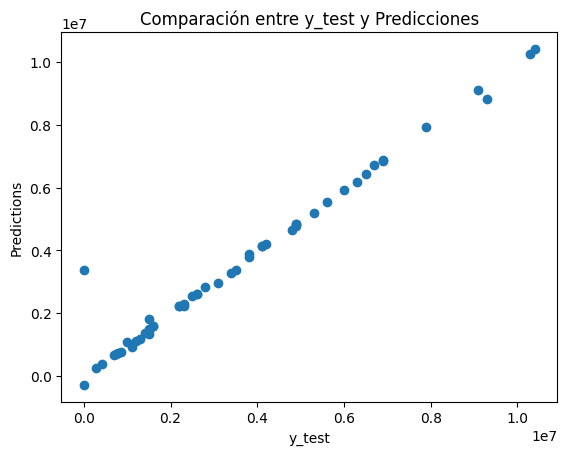

In [15]:
# Gráfico de dispersión
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Comparación entre y_test y Predicciones')
plt.show()

### **Tabla Test vs. Predicciones**

En esta tabla comparamos exactamente para ciertas filas del dataset de test (es decir, datos a los que la máquina nunca tuvo acceso, son datos que tranquilamente pueden ser nuevos para el modelo extraídos de casos actuales de canales de YouTube reales) los valores de predicción de ingresos anuales versus los valores reales.

In [16]:
# Configurar el formato de visualización para números de punto flotante
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Crear un dataframe con las columnas requeridas
result_table = pd.DataFrame({
    'Nombre del canal': df.loc[X_test.index, 'Youtuber'],
    'Predicción': predictions,
    'Earnings Anuales Real': y_test,
})

# Calcular la diferencia entre las predicciones y los earnings reales
result_table['Diferencia'] = result_table['Earnings Anuales Real'] - result_table['Predicción']

# Ordenar el DataFrame por la columna 'earnings' de mayor a menor
result_table = result_table.sort_values(by='Earnings Anuales Real', ascending=False)

In [ ]:
result_table

,Nombre del canal,Predicción,Earnings Anuales Real,Diferencia
204,Think Music India,10416961.759,10400000.000,-16961.759
242,Right to Shiksha,10258896.359,10300000.000,41103.641
60,DUDU e CAROL,8837513.213,9300000.000,462486.787
15,ImagineDragons,9113903.477,9100000.000,-13903.477
142,Unspeakable,7931116.409,7900000.000,-31116.409
46,Lady Gaga,6892000.425,6900000.000,7999.575
25,Brent Rivera,6847599.490,6900000.000,52400.510
33,EminemVEVO,6706274.007,6700000.000,-6274.007
152,ýýýýýýýý ýý ýýýýýýýý,6434112.353,6500000.000,65887.647
170,A2 Motivation by Arvind Arora,6178257.072,6300000.000,121742.928


# 7. Análisis del modelo

In [18]:
# Obtener los coeficientes
coefficients = model.coef_

# Crear un DataFrame para mostrar los coeficientes junto con el nombre de la variable
coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients})

# Ordenar el DataFrame por coeficientes de mayor a menor
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Mostrar el DataFrame con los coeficientes
print(coefficients_df)

                            Variable  Coefficient
16          category_News & Politics   692578.893
9                 category_Education   445540.972
11         category_Film & Animation   440077.795
19     category_Science & Technology   420221.265
21                   category_Sports   415498.042
8                    category_Comedy   409639.927
20                    category_Shows   405038.074
15                    category_Music   398607.628
12                   category_Gaming   396549.733
17           category_People & Blogs   393584.080
13            category_Howto & Style   393580.682
10            category_Entertainment   345859.859
2                            uploads        3.833
3   video_views_for_the_last_30_days        0.049
7          category_Autos & Vehicles        0.000
18           category_Pets & Animals        0.000
1                        video views       -0.000
5                         Population       -0.000
0                        subscribers       -0.001


## 8. Replicamos el mismo proceso pero aplicando otro algoritmo de regresión llamado **RandomForestRegressor**
## También aplicamos una técnica llamada cross-validation 

In [19]:
model = RandomForestRegressor()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

## **Cross-validation**

Validación cruzada (cross-validation) es una técnica utilizada en machine learning para evaluar el rendimiento de un modelo de manera más robusta y confiable. La idea es dividir el conjunto de datos en varias partes, entrenar y evaluar el modelo varias veces, cambiando qué parte del conjunto de datos se utiliza como conjunto de entrenamiento y cuál como conjunto de prueba en cada iteración.

En términos más simples, en lugar de entrenar y evaluar el modelo una sola vez, la validación cruzada realiza múltiples rondas de entrenamiento y evaluación, promediando los resultados. Esto ayuda a obtener una estimación más precisa del rendimiento del modelo y a reducir el riesgo de que los resultados dependan en gran medida de una única división específica de los datos.

Un método común de validación cruzada es el llamado "k-fold cross-validation", donde el conjunto de datos se divide en k partes (llamadas "folds"), y el modelo se entrena y evalúa k veces, utilizando una parte diferente como conjunto de prueba en cada iteración. Luego se promedian los resultados para obtener una medida global del rendimiento del modelo. Esto ayuda a asegurar que el modelo funcione bien de manera consistente en diferentes partes del conjunto de datos.

In [21]:
# Aplicar cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

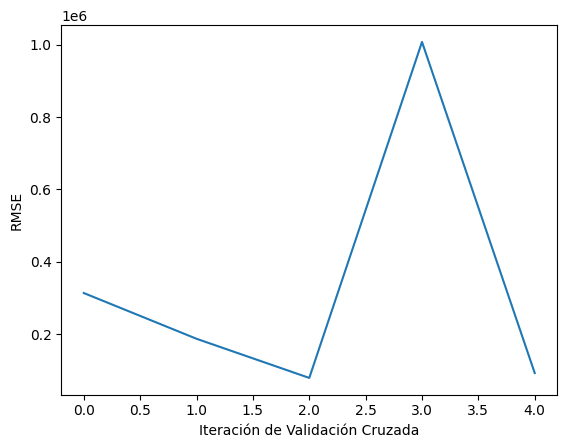

In [22]:
import matplotlib.pyplot as plt

plt.plot(cv_rmse_scores)
plt.xlabel('Iteración de Validación Cruzada')
plt.ylabel('RMSE')
plt.show()

In [23]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcula el R-squared
r_squared = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'Cross-Validation RMSE: {np.mean(cv_rmse_scores)}')
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'R-squared: {r_squared}')

Cross-Validation RMSE: 335753.68101340736
Test RMSE: 481786.01394418953
Test MSE: 232117763232.23077
R-squared: 0.9686107254042231


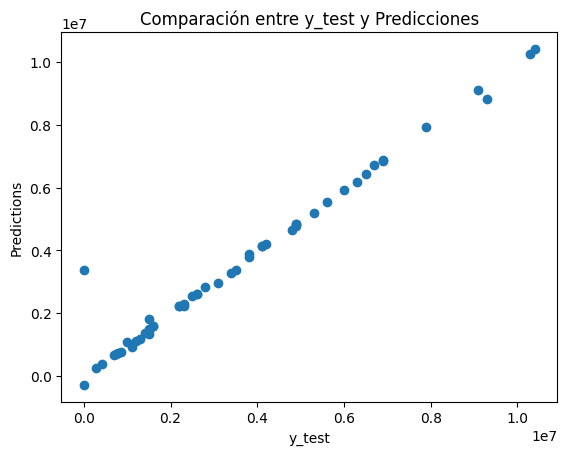

In [24]:
# Gráfico de dispersión
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Comparación entre y_test y Predicciones')
plt.show()

In [25]:
# Configurar el formato de visualización para números de punto flotante
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Crear un dataframe con las columnas requeridas
result_table = pd.DataFrame({
    'Nombre del canal': df.loc[X_test.index, 'Youtuber'],
    'Predicción': y_pred,
    'Earnings Anuales Real': y_test,
})

# Calcular la diferencia entre las predicciones y los earnings reales
result_table['Diferencia'] = result_table['Earnings Anuales Real'] - result_table['Predicción']

# Ordenar el DataFrame por la columna 'earnings' de mayor a menor
result_table = result_table.sort_values(by='Earnings Anuales Real', ascending=False)

In [26]:
result_table

,Nombre del canal,Predicción,Earnings Anuales Real,Diferencia
204,Think Music India,10259000.000,10400000.000,141000.000
242,Right to Shiksha,10255000.000,10300000.000,45000.000
60,DUDU e CAROL,9398000.000,9300000.000,-98000.000
15,ImagineDragons,9324000.000,9100000.000,-224000.000
142,Unspeakable,7934000.000,7900000.000,-34000.000
46,Lady Gaga,6677000.000,6900000.000,223000.000
25,Brent Rivera,6718000.000,6900000.000,182000.000
33,EminemVEVO,6665000.000,6700000.000,35000.000
152,ýýýýýýýý ýý ýýýýýýýý,6612000.000,6500000.000,-112000.000
170,A2 Motivation by Arvind Arora,6083000.000,6300000.000,217000.000


In [27]:
# Obtener la importancia de las variables
importances = model.feature_importances_

# Crear un DataFrame para mostrar las importancias
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame con las importancias de las variables
print(feature_importance_df)

                             Feature  Importance
3   video_views_for_the_last_30_days       0.984
14                   category_Movies       0.013
4       subscribers_for_last_30_days       0.002
2                            uploads       0.000
5                         Population       0.000
1                        video views       0.000
6               years_since_creation       0.000
0                        subscribers       0.000
10            category_Entertainment       0.000
8                    category_Comedy       0.000
15                    category_Music       0.000
17           category_People & Blogs       0.000
12                   category_Gaming       0.000
9                 category_Education       0.000
13            category_Howto & Style       0.000
19     category_Science & Technology       0.000
11         category_Film & Animation       0.000
16          category_News & Politics       0.000
20                    category_Shows       0.000
21                  

El resultado del feature_importance en un modelo de bosque aleatorio (RandomForestRegressor) indica la importancia relativa de cada característica en la predicción del modelo. En este caso, el modelo ha asignado una importancia significativa a la variable "video_views_for_the_last_30_days", mientras que las demás características tienen una importancia cercana a cero.